# ProRail Thomas, Sinem en Carlo

## Importeren modules

In [1]:
# Data processing
import pandas as pd
import numpy as np
import math

# Data visualisation
import matplotlib.pyplot as plt

# Model training / predicting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Inladen van de dataset

In [2]:
dataset = pd.read_csv('sap_storing_data_hu_project.csv',sep=',')

/Users/wolfsinem/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data analyse

In [3]:
dataset.head()

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2014,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,34415,3617016,07/05/2014 05:44:24,0
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,...,1,2006,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704590,13/06/2013 13:37:52,0
2,2,50053213,48.0,GN,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-P,NaN,...,1,2006,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704591,13/06/2013 13:37:52,0
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-P,NaN,...,1,2006,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704592,13/06/2013 13:37:52,0
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-P,NaN,...,1,2006,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704593,13/06/2013 13:37:52,0


#### Vorm van de dataset

In [4]:
dataset.shape

(898526, 140)

#### Kolommen in de dataset

In [5]:
dataset.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_mon_meld_ddt', 'stm_sap_meldtekst_lang',
       'stm_mon_begin_ddt', 'stm_sap_meldtekst', 'stm_mon_toelichting_trdl',
       ...
       'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt',
       'stm_x_bron_bestandsnaam', 'stm_x_bron_arch_dt', 'stm_x_actueel_ind',
       'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt',
       'stm_x_vervallen_ind'],
      dtype='object', length=140)

---
De dataset heeft <b>890.000</b> rijen en <b>140 </b>kolommen. Deze bevat zoals je ziet ook veel NULL waarden, de volgende cel laat de <b>verdeling</b> zien van het percentage null-waarden per kolom.

In [6]:
(pd.isnull(dataset).sum() / len(dataset) * 100).describe()

count    140.000000
mean      30.492376
std       33.150049
min        0.000000
25%        0.004229
50%       18.094802
75%       63.303566
max       99.442198
dtype: float64

    - Kolommen missen gemiddeld 30% van hun waarden.
    - 50% van alle kolommen missen minder dan 18% data.

#### De volgende cel laat zien welke datatypen er voorkomen in de dataset.

In [7]:
dataset.dtypes

Unnamed: 0                object
#stm_sap_meldnr            int64
stm_mon_nr               float64
stm_vl_post               object
stm_sap_meld_ddt          object
                          ...   
stm_x_actueel_ind          int64
stm_x_run_id               int64
stm_x_bk                   int64
stm_x_start_sessie_dt     object
stm_x_vervallen_ind        int64
Length: 140, dtype: object

## Data cleaning

De oorspronkelijke dataset bevat zoals eerder laten zien uit <b>140</b> kolommen. De meeste van deze kolommen missen veel waarden waardoor we deze niet meenemen. Als team hebben we daarom samen gekeken naar alle beschikbare kolommen en de <b>relevante</b> eruit geselecteerd. Hiervan hebben we een nieuwe data dictionary aangemaakt, met in de eerste kolom het <b>geselecteerde kolom</b> en de tweede kolom is een <b>beschrijving</b> hiervan.

In [8]:
selected_columns = pd.read_csv('data-dictionary.csv', delimiter=';', header=None,index_col =0)

#### Data Dictionary

In [9]:
selected_columns

,1
0,
#stm_sap_meldnr,RVO nummer
stm_geo_mld,Geo code van melding
stm_equipm_soort_mld,Equipment soort
stm_prioriteit,Prioriteitsindicatie
stm_contractgeb_gst,Het contract gebied
stm_techn_gst,Techniekveld melding
stm_oorz_groep,Oorzaak groep
stm_oorz_code,Oorzaak code
stm_tao_indicator,Gerelateerd aan mutatie in database (er kunne...


#### We nemen alleen de kolommen mee in de dataset die in de data dictionary zitten, zoals hierboven te zien is.

In [10]:
dataset = dataset[selected_columns.index]

In [11]:
dataset.head()

,#stm_sap_meldnr,stm_geo_mld,stm_equipm_soort_mld,stm_prioriteit,stm_contractgeb_gst,stm_techn_gst,stm_oorz_groep,stm_oorz_code,stm_tao_indicator,stm_tao_indicator_vorige,...,stm_sap_storeind_ddt,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_progfh_in_ddt,stm_progfh_in_invoer_ddt,stm_progfh_in_duur,stm_progfh_gw_ddt,stm_fh_ddt,stm_fh_duur,stm_fh_status
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50053211,624,NaN,9.0,81.0,S,ONR-RIB,133.0,N,NaN,...,02/01/2006 09:00:00,02/01/2006 09:00:00,NaN,NaN,NaN,1e+08,NaN,02/01/2006 09:00:00,0.0,4.0
2,50053213,201,NaN,9.0,37.0,B,ONR-DERD,143.0,N,NaN,...,02/01/2006 13:26:00,02/01/2006 12:35:00,NaN,NaN,NaN,1e+08,NaN,02/01/2006 13:26:00,51.0,4.0
3,50053214,25,NaN,9.0,32.0,B,ONR-DERD,142.0,N,NaN,...,02/01/2006 17:20:00,02/01/2006 16:40:00,NaN,NaN,NaN,1e+08,NaN,02/01/2006 17:20:00,40.0,4.0
4,50053215,12,NaN,9.0,35.0,B,ONR-DERD,142.0,N,NaN,...,02/01/2006 22:36:00,02/01/2006 22:30:00,NaN,NaN,NaN,1e+08,NaN,02/01/2006 22:36:00,6.0,4.0


#### Hier zullen we de dubbele waarden die in de dataset voorkomen verwijderen. Daarnaast hebben we met de Product Owners eerder besproken om <i>alleen</i> rijen met storingen mee te nemen die tot 6 uur duren.

In [12]:
dataset.drop_duplicates(inplace=True)

In [13]:
dataset = dataset[(dataset["stm_fh_duur"] > 0) & (dataset["stm_fh_duur"] <= 360)]

#### Hieronder zullen we de kolommen omzetten naar datetime zodat we er berekeningen mee kunnen maken.

In [14]:
colums_to_change = ["stm_sap_meld_ddt", "stm_aanngeb_ddt", "stm_aanntpl_ddt", "stm_fh_ddt", "stm_sap_storeind_ddt"]

dataset[colums_to_change] = dataset[colums_to_change].apply(pd.to_datetime, format="%d/%m/%Y %H:%M:%S")

De huidige dataset bevat een kolom met <b>'stm_fh_duur'</b>. Deze kolom is de volledige duur van het functieherstel en de tijd dat de aannemer ter plaatse moet komen. We hebben op basis hiervan een nieuwe <b>'stm_fh_duur_2'</b> kolom aangemaakt die de duur van de reistijd van de aannemer die ter plaatse moet komen er af haalt. Hierdoor bevat <b>stm_fh_duur_2</b> de duur van alleen het functieherstel.

In [15]:
dataset["stm_fh_duur_2"] = pd.Series(dataset["stm_fh_duur"] - ((dataset["stm_aanntpl_ddt"] - dataset["stm_sap_meld_ddt"]).dt.seconds)/60)
dataset = dataset[(dataset["stm_fh_duur_2"] > 0) & (dataset["stm_fh_duur_2"] <= 360)]

We gebruiken voor onze modellen alleen de data vanaf <b>2017</b>. We hebben specifiek hiervoor gekozen omdat de data die ouder is dan <b>2017</b> minder accuraat ingevuld kunnen zijn en deze kunnen daarnaast ook verouderd zijn. Hierdoor kunnen onze modellen minder goed presteren.

In [16]:
dataset = dataset[dataset["stm_sap_meld_ddt"].dt.year >= 2017]

## Data exploration

#### Aantal storingen per jaar

In [17]:
labels_year = dataset["stm_sap_meld_ddt"].groupby([dataset["stm_sap_meld_ddt"].dt.year.rename('year')]).agg({'count'}).index
data_year = dataset["stm_sap_meld_ddt"].groupby([dataset["stm_sap_meld_ddt"].dt.year.rename('year')]).agg({'count'})["count"]

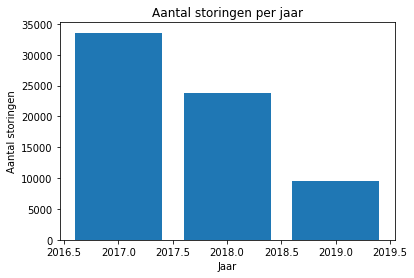

In [18]:
plt.bar(labels_year, height=data_year)
plt.title("Aantal storingen per jaar")
plt.xlabel("Jaar")
plt.ylabel("Aantal storingen")
plt.show()

Zoals we in de grafiek kunnen zien schoot het aantal storingen in <b>2013</b> omhoog. In de vervolg jaren nam het aantal storingen ieder jaar weer af. Het lage aantal storingen van <b>2019</b> komt doordat wij de data halverwege <b>2019</b> hebben verkregen. Hierdoor is het aantal storingen van <b>2019</b> veel lager.

#### Gemiddelde reparatieduur per soort storing in de dataset

---

In de grafiek hieronder laten we de gemiddelde reparatieduur per soort melding in de dataset zien. Zoals je ziet komt 'TREINBEINV' het meeste voor en staat 'SEIN' op de 5e plaats

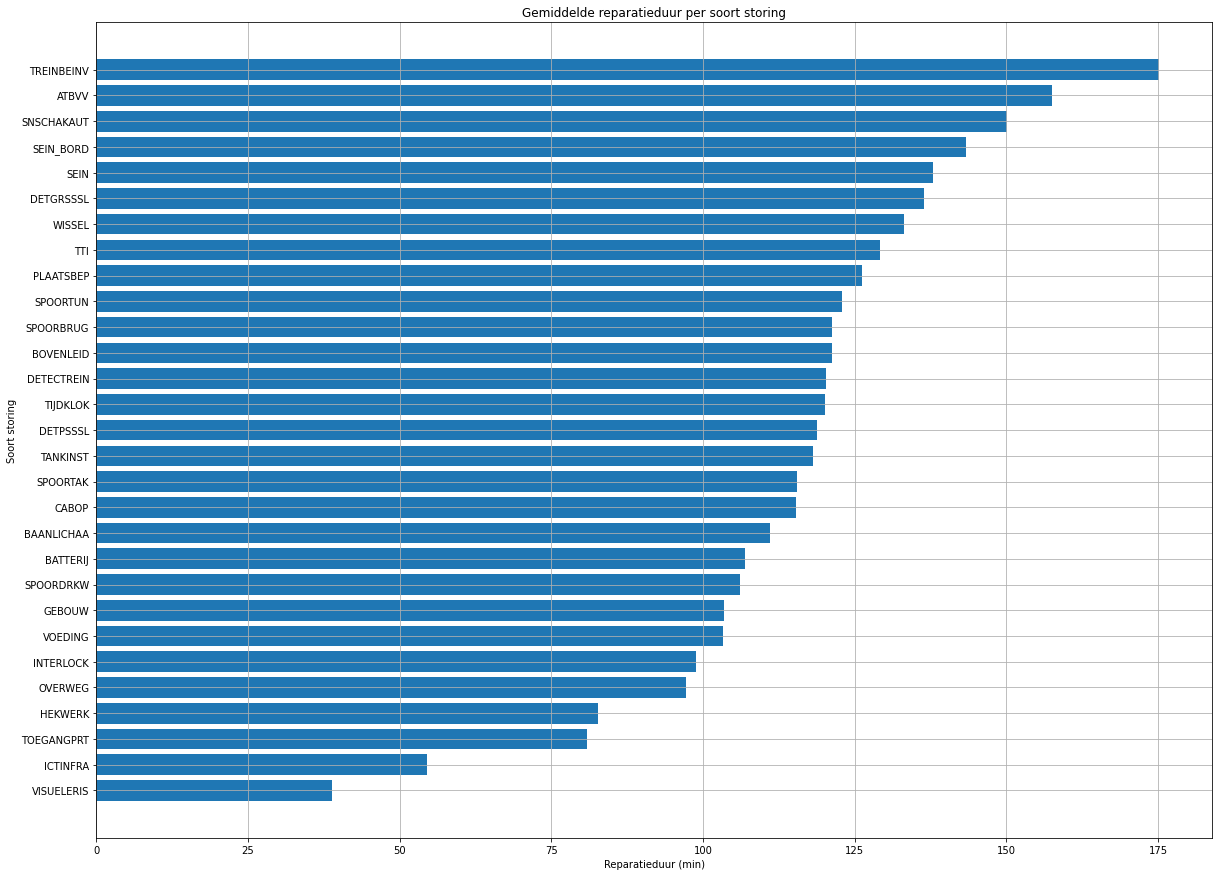

In [19]:
soort_storing = dataset['stm_equipm_soort_mld'].value_counts(dropna=False)[:30].index
gemiddelde_tijd = dataset[dataset['stm_equipm_soort_mld'].isin(soort_storing)].groupby('stm_equipm_soort_mld')['stm_fh_duur'].mean().sort_values()

plt.figure(figsize=[20,15])
plt.barh(gemiddelde_tijd.index, gemiddelde_tijd.values)
plt.grid()
plt.title("Gemiddelde reparatieduur per soort storing")
plt.xlabel("Reparatieduur (min)")
plt.ylabel("Soort storing")
plt.show()

#### Verschillende invloeden op het aantal storingen per dag van de week, uur op een dag en maand in het jaar

---

In de de onderstaande plots laten we zien of een dag van de week, uur van de dag en maand van het jaar invloed blijken te hebben op het aantal storingen.

- <b>Weekdag 0 t/m 6 op de xas</b>
    - Op de donderdag komen de meeste storingen voor
    - Gemiddeld duurt een storing op de zondag het langst
    - In het weekend komen duidelijk de minste storingen voor

- <b>Maand 1 t/m 12 op de xas</b>
    - In de eerste maand (januari) zijn de meeste storingen
    - De totale duur van een storing is in de maand januari het langst
    - Wel duurt een gemiddelde storing in de maand december het langst
  
- <b>Uur 0 t/m 23 op de xas</b> 
    - Om 9 uur in de ochtend komen de meeste storingen voor
    - Om 10 uur in de ochtend duren de storingen het langst
    - Om 22:00 duren de storingen gemiddeld het langst

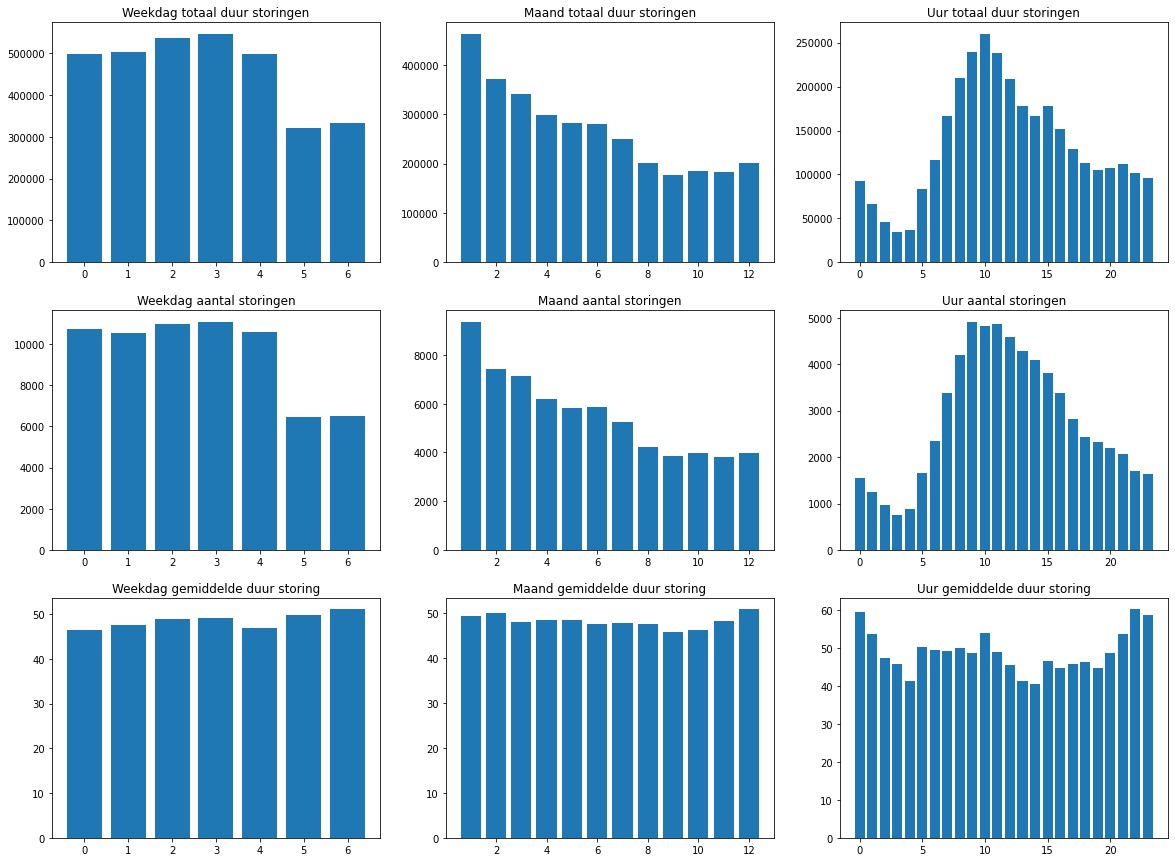

In [20]:
fig, axs = plt.subplots(3, 3,figsize=(20, 15))
list1 = ["Weekdag","Maand","Uur"]
for i in range(len(list1)):
    if i == 0:
        dataset2 = dataset.groupby(dataset['stm_sap_meld_ddt'].dt.weekday)
    if i == 1:
        dataset2 = dataset.groupby(dataset['stm_sap_meld_ddt'].dt.month)
    if i == 2:
        dataset2 = dataset.groupby(dataset['stm_sap_meld_ddt'].dt.hour)

        
    axs[0, i].bar(dataset2.count().index, dataset2['stm_fh_duur_2'].sum())
    axs[0, i].set_title(list1[i] + " totaal duur storingen")

    axs[1, i].bar(dataset2.count().index,dataset2['stm_fh_duur_2'].count())
    axs[1, i].set_title(list1[i] + " aantal storingen")

    axs[2, i].bar(dataset2.count().index,dataset2['stm_fh_duur_2'].sum() / dataset2['stm_fh_duur_2'].count())
    axs[2, i].set_title(list1[i] + " gemiddelde duur storing")
    
plt.show()

#### Conclusie

In de onderstaande plots van het figuur hierboven, zien we dat de uitkomsten vrij uniform zijn als we kijken naar het gemiddelde. Hieruit kunnen we concluderen dat deze factoren niet veel invloed zullen hebben in ons voorspellingsmodel. Dit hebben we uiteraard ook eerst getest. Daarom zullen we deze niet meenemen.

## Baseline
--- 

In het baseline model zullen we het gemiddelde nemen van storings-duur in de jaren <b>2017</b> en <b>2018</b>.

In [21]:
baseline_dataset = dataset[["stm_fh_duur_2", "stm_sap_meld_ddt"]]

In [22]:
baseline_train = dataset['stm_fh_duur_2'][baseline_dataset["stm_sap_meld_ddt"].dt.year < 2019]
baseline_test = dataset['stm_fh_duur_2'][baseline_dataset["stm_sap_meld_ddt"].dt.year == 2019]

In [23]:
baseline_pred = [baseline_train.mean()]*len(baseline_test)

In [24]:
math.sqrt(mean_squared_error(baseline_test, baseline_pred))

53.251100947959465

Zoals je ziet behalen we een <b>Mean Squeared Error (MSE)</b> van 53.25 in het baseline model. Dit betekent dat er een gemiddelde kwadratische afwijking is van 53.25 minuten bij het berekenen van de storings-duur.

#### Categoriaal

--- 
Omdat in de dataset veel categoriale kolommen voorkomen, hebben wij ervoor gekozen om ook een categoriaal model te gebruiken. Hiervoor moeten wij de <b>accuracy score</b> berekenen i.p.v. de <b>MSE</b> zoals hierboven berekend.

Voor de baseline worden de storingen opgedeeld in categorieën per 30 minuten.

In [25]:
baseline_train = dataset['stm_fh_duur_2'][dataset["stm_sap_meld_ddt"].dt.year < 2019]
baseline_train_cat = baseline_train // 15
baseline_test = dataset['stm_fh_duur_2'][dataset["stm_sap_meld_ddt"].dt.year == 2019]
baseline_test_cat = baseline_test // 15

In [26]:
baseline_pred = [baseline_train.mean()]*len(baseline_test)
baseline_pred_cat = [baseline_train_cat.mode()]*len(baseline_test)

In [27]:
accuracy_score(baseline_pred_cat,baseline_test_cat)

0.3386282347990743

Zoals je kunt zien behalen we hier een <b>accuracy score</b> van <b>0.3386</b>. Dit betekent dat we <b>33.9% accuraatheid</b> behalen door het gemiddelde te nemen van de storings-duur

#### Histogram met de meest voorkomende aantal storingen per categorie van 15 minuten.

---

Uit de histogram kunnen we lezen dat de meeste storingen voorkomen in de eerste half uur. Dit betekent dat de meeste storingen niet langer duren dan 15 minuten.

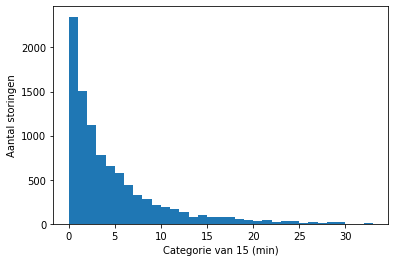

In [68]:
plt.hist(baseline_test_cat,bins=int(max(baseline_test_cat)))
plt.xlabel('Categorie van 15 (min)')
plt.ylabel('Aantal storingen')
plt.show()

#### Accuracy score per categorie-grootte

---

In de onderstaande grafiek laten we de precisie tonen per categorie-grootte
   - Als een storing valt onder <b>40</b> minuten, is er een accuracy score van <b>60 (%)</b>
   - Als je een grootte neemt <b>120 minuten</b> haal je de beste accuracy
   - We hebben er uiteindelijk toch voor gekozen om een grootte te nemen van <b>15 minuten</b>. Dit hebben we namelijk samen met de Product Owner overlegd.

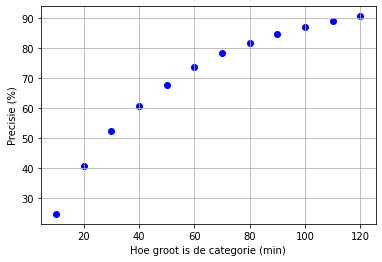

In [30]:
for i in range(120,1,-10):
    baseline_train_cat = baseline_train // i
    baseline_test_cat = baseline_test // i
    baseline_pred_cat = [baseline_train_cat.mode()]*len(baseline_test_cat)
    plt.scatter(i,float(accuracy_score(baseline_pred_cat,baseline_test_cat) * 100),c='blue')

plt.ylabel("Precisie (%)")
plt.xlabel("Hoe groot is de categorie (min)")
plt.grid(True)
plt.show()

## Model
---

#### Dataset voorbereiden voor model-training

--- 

De uiteindelijke dataset bestaat uit:
- De categoriale waarden <b>stm_prioriteit</b>, <b>stm_techn_gst</b>, <b>stm_oorz_groep</b>
- De numerieke waarden <b>stm_sap_meld_ddt</b> en <b>stm_fh_duur_2</b>

In [31]:
category_columns = ["stm_prioriteit", "stm_techn_gst", "stm_oorz_groep"]
model_dataset = dataset[['stm_sap_meld_ddt','stm_fh_duur_2'] + category_columns]
model_dataset.dropna(inplace=True)

/Users/wolfsinem/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### In de onderstaande figuur is er een overzicht te zien per kolom en het aantal extra kolommen (dummies) wat gegenereerd wordt.
- Kolom stm_prioriteit heeft bijvoorbeeld 7 extra kolommen

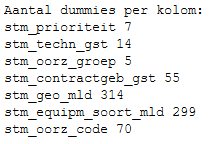

#### Hieronder worden de dummies aan de model_dataset toegevoegd en veranderen we de data type van de categoriale kolommen naar 'category'.

In [32]:
model_dataset[category_columns] = model_dataset[category_columns].astype('category')
dummy_dataset = pd.get_dummies(model_dataset[category_columns])
model_dataset = model_dataset.merge(dummy_dataset,left_index=True, right_index=True)
model_dataset.drop(category_columns,axis=1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Om het uiteindelijke model te trainen en testen worden hiervoor train- en testsets aangemaakt:

- <b>model_train_X</b>
    - De 'Independent Variables' waarin alleen data wordt meegenomen tussen 2017 en 2019
- <b>model_train_y</b>
    - De 'Target Variable' waarin we kolom <b>stm_fh_duur_2</b> tussen 2017 en 2019 meenemen omdat we deze willen voorspellen
- <b>model_train_y_cat</b>
    - De 'Target Variable' per categorie van 30 minuten, tussen 2017 en 2019
    
---

- <b>model_test_X</b>
    - De 'Independent Variables' waarin alleen data wordt meegenomen uit 2019
- <b>model_test_y</b>
    - De 'Target Variable' waarin we kolom <b>stm_fh_duur_2</b> uit 2019 meenemen omdat we deze willen voorspellen
- <b>model_test_y_cat</b>
    - De 'Target Variable' per categorie van 30 minuten, in 2019

In [33]:
model_train_X = model_dataset[dummy_dataset.columns][model_dataset["stm_sap_meld_ddt"].dt.year < 2019]
model_train_y = round(model_dataset["stm_fh_duur_2"][model_dataset["stm_sap_meld_ddt"].dt.year < 2019]).astype('int')
model_train_y_cat = model_dataset["stm_fh_duur_2"][model_dataset["stm_sap_meld_ddt"].dt.year < 2019] // 15

model_test_X = model_dataset[dummy_dataset.columns][model_dataset["stm_sap_meld_ddt"].dt.year == 2019]
model_test_y = round(model_dataset["stm_fh_duur_2"][model_dataset["stm_sap_meld_ddt"].dt.year == 2019]).astype('int')
model_test_y_cat = model_dataset["stm_fh_duur_2"][model_dataset["stm_sap_meld_ddt"].dt.year == 2019] // 15

#### Model-training 

--- 

Tijdens het onderzoek in het vinden van een goed model hebben we verschillende modellen uitgeprobeerd en daaruit kwam voort dat we met het DecisionTreeClassifier model de beste score behalen.

In [34]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(model_train_X, model_train_y_cat)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
model.score(model_test_X, model_test_y_cat)

0.3355034235043215

#### Zoals je ziet hebben we met het DecisionTreeClassifier model een score behaald van: 0.3355. Dit houdt in dat we in 33.5% van de gevallen de juiste categorie voorspellen waarin een storings-duur valt.

#### Visualisatie Decision Tree

--- 

Door de grootte van de tree is het lastig om deze op een duidelijke manier te visualiseren in de notebook. In de bijlage wordt er een pdf toegevoegd met de volledige tree.

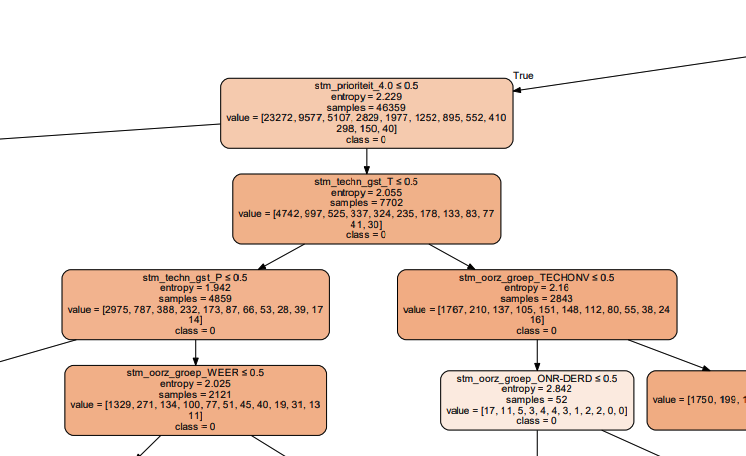

# Validatie

---

In dit deel van de notebook zullen we ons model gaan valideren aan de hand van de validatieset.

#### Importeren van de validatie dataset

In [37]:
validatie_set = pd.read_csv("Validatieset_CSV_-_zonder_targetvariabelen_V2.csv", delimiter=";")

In [38]:
validatie_set.head()

,ID,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,160476,70277067,0.0,NaN,25/05/2017 15:16:37,25/05/2017 15:16:37,Vry : km 55.9 Spoor 353 smeulende biels.,NaN,Vry : km 55.9 Spoor 353 smeulende biels.,NaN,...,11,2017,13/11/2017 06:00:07,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1,278241,3740168,13/11/2017 06:06:30,0
1,160480,70277073,4315506.0,EHV,25/05/2017 15:49:40,25/05/2017 15:41:00,Btl-Vga : GRS SSL sectie 607CT VGA-BTL Rijric...,25/05/2017 15:41:00,Btl-Vga : GRS SSL sectie 607CT VGA-BTL,F5 - Spoor/wissels,...,10,2017,17/10/2017 06:00:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1,251580,3740170,17/10/2017 06:06:04,0
2,160482,70277079,4315569.0,KFH,25/05/2017 16:38:20,25/05/2017 17:11:00,Bot-Ps : Botbr geen rijweginstelling mogelijk ...,25/05/2017 17:11:00,Bot-Ps : Botbr geen rijweginstelling mog,F5 - Spoor/wissels,...,7,2017,17/07/2017 09:25:15,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1,162293,3740171,17/07/2017 09:27:43,0
3,160483,70277081,0.0,NaN,25/05/2017 16:41:44,25/05/2017 16:41:44,Ddr-Wld : Sp-PA km 25.180 HOTBOX 119 loc 2141 ...,NaN,Ddr-Wld : Sp-PA km 25.180 HOTBOX 119 loc,NaN,...,5,2017,26/05/2017 06:00:11,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1,117414,3740172,30/05/2017 06:05:35,0
4,160488,70277086,4315597.0,ZL,25/05/2017 17:15:14,25/05/2017 17:43:00,Ns : Sp-122 smeulende dwl (halverwege perron).,25/05/2017 17:43:00,Ns : Sp-122 smeulende dwl (halverwege pe,F5 - Spoor/wissels,...,10,2017,17/10/2017 06:00:16,E:\Informatica\Inbox\Informatica\SAP\Storingen...,31/12/9999 00:00:00,1,251580,3740174,17/10/2017 06:06:04,0


#### Voor de validatie dataset nemen we de categoriale kolommen die ook in model_dataset zijn meegenomen

In [39]:
validatie_set = validatie_set[category_columns]

#### Voor de validatie dataset worden ook dummies toegevoegd. Dit wordt gedaan volgens de zelfde stappen als de model_dataset.

In [41]:
validatie_set[category_columns] = validatie_set[category_columns].astype('category')
dummy_dataset = pd.get_dummies(validatie_set[category_columns])
validatie_set = validatie_set.merge(dummy_dataset,left_index=True, right_index=True)
validatie_set.drop(category_columns,axis=1, inplace=True)

In [42]:
validatie_set.head()

,stm_prioriteit_1.0,stm_prioriteit_2.0,stm_prioriteit_4.0,stm_prioriteit_5.0,stm_techn_gst_B,stm_techn_gst_E,stm_techn_gst_G,stm_techn_gst_I,stm_techn_gst_K,stm_techn_gst_O,stm_techn_gst_P,stm_techn_gst_S,stm_techn_gst_T,stm_oorz_groep_ONR-DERD,stm_oorz_groep_ONR-RIB,stm_oorz_groep_TECHONV,stm_oorz_groep_WEER
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
validatie_set.shape

(89, 17)

In [45]:
model_train_X.shape

(53785, 23)

#### Als we kijken naar de validatie dataset zien we dat deze 17 kolommen bevat, terwijl de model_train_X 23 kolommen heeft. Door middel van een functie die hieronder wordt uitgevoerd kunnen we achterhalen welke kolommen we missen. De missende kolommen voegen we vervolgens weer toe aan de validatie dataset

In [46]:
model_kolommen = model_train_X.columns
validatie_kolommen = validatie_set.columns
verschil = validatie_kolommen.symmetric_difference(model_kolommen)

#### De kolommen die niet in de validatie dataset voorkomen

In [47]:
verschil

Index(['stm_prioriteit_8.0', 'stm_prioriteit_9.0', 'stm_techn_gst_A',
       'stm_techn_gst_M', 'stm_techn_gst_R', 'stm_techn_gst_X'],
      dtype='object')

#### Missende kolommen toevoegen aan de validatie dataset en deze vervolgens in de juiste volgorde zetten

In [48]:
for column in verschil:
    validatie_set[column] = np.array(0)
    
validatie_set = validatie_set.reindex(columns=model_train_X.columns)

In [51]:
validatie_set.head()

,stm_prioriteit_1.0,stm_prioriteit_2.0,stm_prioriteit_4.0,stm_prioriteit_5.0,stm_prioriteit_8.0,stm_prioriteit_9.0,stm_techn_gst_A,stm_techn_gst_B,stm_techn_gst_E,stm_techn_gst_G,...,stm_techn_gst_O,stm_techn_gst_P,stm_techn_gst_R,stm_techn_gst_S,stm_techn_gst_T,stm_techn_gst_X,stm_oorz_groep_ONR-DERD,stm_oorz_groep_ONR-RIB,stm_oorz_groep_TECHONV,stm_oorz_groep_WEER
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In de dataframe hierboven kunnen we zien dat alle kolommen in orde zijn en we door kunnen met het voorspellen van onze target variabele.

---

#### Predict uitvoeren op de validatie dataset

In [52]:
pred_validatie = pd.Series(model.predict(validatie_set))

In [53]:
pred_validatie

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
84    0.0
85    0.0
86    0.0
87    0.0
88    0.0
Length: 89, dtype: float64

#### Validatie dataset met target variabelen inlezen

In [55]:
validatie_target_set = pd.read_csv("Validatieset_Excel_-_met_targetvariabelen_V2.csv", delimiter=";")

In [56]:
validatie_target_set.head()

,ID,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,...,stm_progfh_gw_datum,stm_progfh_gw_tijd,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_mon_eind_tijd
0,160476,70277067,0.0,NaN,25/05/2017 15:16:37,25/05/2017 15:16:37,Vry : km 55.9 Spoor 353 smeulende biels.,NaN,Vry : km 55.9 Spoor 353 smeulende biels.,NaN,...,25/05/2017,16:10:01,25/05/2017,16:09:00,45.0,32.0,25/05/2017,16:09:00,NaN,NaN
1,160480,70277073,4315506.0,EHV,25/05/2017 15:49:40,25/05/2017 15:41:00,Btl-Vga : GRS SSL sectie 607CT VGA-BTL Rijric...,25/05/2017 15:41:00,Btl-Vga : GRS SSL sectie 607CT VGA-BTL,F5 - Spoor/wissels,...,25/05/2017,17:45:00,25/05/2017,17:31:00,94.0,15.0,NaN,00:00:00,25/05/2017,18:03:00
2,160482,70277079,4315569.0,KFH,25/05/2017 16:38:20,25/05/2017 17:11:00,Bot-Ps : Botbr geen rijweginstelling mogelijk ...,25/05/2017 17:11:00,Bot-Ps : Botbr geen rijweginstelling mog,F5 - Spoor/wissels,...,25/05/2017,18:30:00,25/05/2017,18:15:00,87.0,67.0,25/05/2017,18:15:00,25/05/2017,19:27:00
3,160483,70277081,0.0,NaN,25/05/2017 16:41:44,25/05/2017 16:41:44,Ddr-Wld : Sp-PA km 25.180 HOTBOX 119 loc 2141 ...,NaN,Ddr-Wld : Sp-PA km 25.180 HOTBOX 119 loc,NaN,...,25/05/2017,22:00:00,25/05/2017,21:46:00,298.0,272.0,25/05/2017,21:46:00,NaN,NaN
4,160488,70277086,4315597.0,ZL,25/05/2017 17:15:14,25/05/2017 17:43:00,Ns : Sp-122 smeulende dwl (halverwege perron).,25/05/2017 17:43:00,Ns : Sp-122 smeulende dwl (halverwege pe,F5 - Spoor/wissels,...,25/05/2017,17:50:00,25/05/2017,18:15:00,55.0,40.0,25/05/2017,19:00:01,25/05/2017,18:07:00


#### De target validatieset moet zoals de vorige dataframes ook omgezet worden zodat we hiermee kunnen werken

In [57]:
validatie_target_set[colums_to_change] = validatie_target_set[colums_to_change].apply(pd.to_datetime, format="%d/%m/%Y %H:%M:%S")

validatie_target_set["stm_fh_duur_2"] = pd.Series(validatie_target_set["stm_fh_duur"] - ((validatie_target_set["stm_aanntpl_ddt"] - validatie_target_set["stm_sap_meld_ddt"]).dt.seconds)/60)

#### Stm_fh_duur_2 wordt gecategoriseerd in 15 minuten 

In [58]:
validatie_target = validatie_target_set["stm_fh_duur_2"] // 15

#### Tijdens het proces zijn we erachter gekomen dat er 4 null-waarden in de target validatie dataset zitten.

In [62]:
validatie_target.isnull().sum()

4

#### We hebben ervoor gekozen om deze null-waarden uit de dataset de verwijderen. Dit omdat het aantal klein is.

In [63]:
# index achterhalen van de null-waarden
index_nan_v = np.argwhere(np.isnan(validatie_target))

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [64]:
# door middel van een forloop deze waarden uit zowel de target validatieset als de pred_validatie halen
for i in index_nan_v[::-1]:
    validatie_target.drop([validatie_target.index[i[0]]], inplace=True)
    pred_validatie.drop([pred_validatie.index[i[0]]], inplace=True)

### Accuracy score berekenen

In [66]:
accuracy_score(pred_validatie, validatie_target)

0.3411764705882353

---

Zoals je hierboven kunt aflezen hebben we met ons <b>DecisionTreeClassifier model</b> een accuracy score behaald van <b>0.3411</b>. Dit houdt in dat we in <b>34.11%</b> van de gevallen een juiste voorspelling doen.

Voor de baseline hadden we een <b>33.9% accuraatheid</b> behaald door het gemiddelde te nemen van de storings-duur.

### Conclusie

In de meeste gevallen is het zo dat een storing valt onder de eerste <b>15 minuten</b>. Zoals we al eerder in de notebook hebben laten zien d.m.v. een grafiek. 

Tijdens het maken van een voorspelling op de validatie set zien we dat veel van deze uitkomsten ook uitkomen in de eerste kwartier. Het model geeft namelijk (bijna) alleen maar dezelfde waarde terug. Dit is terug te zien in de <b>34%</b> accuraatheid in ons model. 

Een <b>oorzaak</b> hiervoor is dat de geleverde dataset niet in ons voordeel heeft gewerkt en er veel kolommen zijn die weinig correlatie met elkaar blijken te hebben. Het is daarom moeilijk om een goede voorspelling te doen.

We kunnen concluderen dat de baseline die we hebben genomen, die de gemiddelde neemt van een storings-duur <b>bijna</b> net zo goed werkt als het model wat we hebben gebouwd. 

    - Baseline: 33.9%
    - DecisionTreeClassifier: 34.11%